<a href="https://colab.research.google.com/github/jess22jess/EDPII/blob/main/TAREA_M%C3%A9t_M%C3%ADn_Cuadr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO DE MÍNIMOS CUADRADOS
**EDP II**

**Jessica Beatriz Arcos Gutiérrez**

---

**Descripción:**

Resuelve la ecuación:
$${\frac{d^2 u}{dx^2} + u = x }$$

con condiciones:
- **Condición inicial:** $u(0) = 0, u´(0) = 2$
- **Dominio:** $0 \leq x \leq 1$

El método de mínimos cuadrados es una técnica numérica para resolver ecuaciones diferenciales ordinarias de forma aproximada. En lugar de buscar una solución exacta, que puede ser compleja o imposible de obtener analíticamente, este método propone una solución aproximada en forma de combinación de funciones simples, como polinomios.

La idea fundamental es encontrar los coeficientes de esta combinación que minimicen el "error" global al sustituir la aproximación en la ecuación diferencial. Este error se mide integrando el cuadrado del residual (la diferencia entre los dos lados de la ecuación) sobre todo el dominio del problema.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sp.symbols('x')  # Definimos la variable x
u = sp.Function('u') # Definimos la función

In [3]:
ode = u(x).diff(x, x) + u(x) - x  # u'' + u - x = 0
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [4]:
sol = sp.dsolve(ode, ics={ u(0): 0, u(x).diff(x).subs(x, 0): 2}) # diccionario

In [5]:
sol

Eq(u(x), x + sin(x))

In [6]:
u_expr = sol.rhs  # Solución exacta

u_num = sp.lambdify(x, u_expr, "numpy") # Convierte a función numérica para evaluación

In [7]:
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

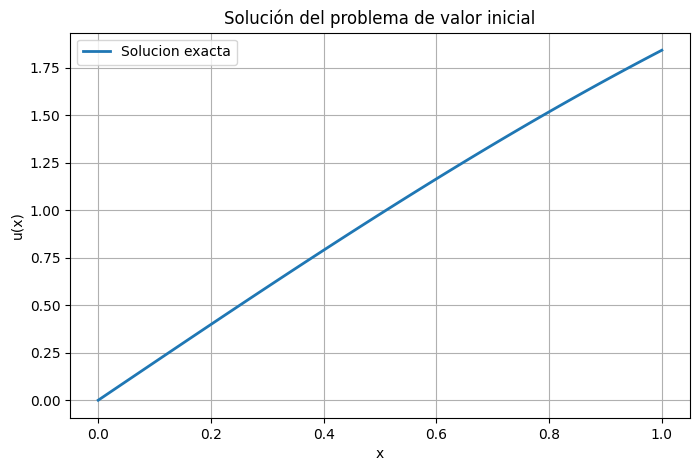

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solucion exacta", linewidth=2)
plt.title('Solución del problema de valor inicial')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid()
plt.legend()
plt.show()

In [9]:
a, b = sp.symbols('a b') # Definir símbolos para coeficientes

u_n = a*x*(1-x) + b*x**2*(1-x)

In [10]:
u_n

a*x*(1 - x) + b*x**2*(1 - x)

In [11]:
E = sp.Function('E')

In [12]:
u_n_2 = sp.diff(u_n, x, 2)  # Calculamos la segunda derivada

E = u_n_2 + u_n - x

In [13]:
E

a*x*(1 - x) + b*x**2*(1 - x) - x - 2*(a + 2*b*x + b*(x - 1))

In [14]:
I = sp.integrate(E**2, (x, 0, 1))  # Integra E² en [0,1]

In [15]:
I

101*a**2/30 + 101*a*b/30 + 11*a/6 + 131*b**2/35 + 19*b/10 + 1/3

In [16]:
# Derivadas parciales para minimización
dIa = sp.diff(I, a)
dIb = sp.diff(I, b)

In [17]:
print(dIa, "\n", dIb )

101*a/15 + 101*b/30 + 11/6 
 101*a/30 + 262*b/35 + 19/10


In [18]:
soleq = sp.solve([dIa, dIb], [a, b], simplify=True)  # Resolver sistema de ecuaciones

In [19]:
soleq

{a: -46161/246137, b: -413/2437}

In [20]:
# Sustituir coeficientes en la función aproximada
u_aprox = u_n.subs(soleq)

In [21]:
u_aprox = E.subs(soleq)

In [22]:
u_aprox

-413*x**2*(1 - x)/2437 - 46161*x*(1 - x)/246137 + 41*x/2437 + 8896/246137

In [23]:
u_aprox_nf = sp.lambdify(x, u_aprox, "numpy")

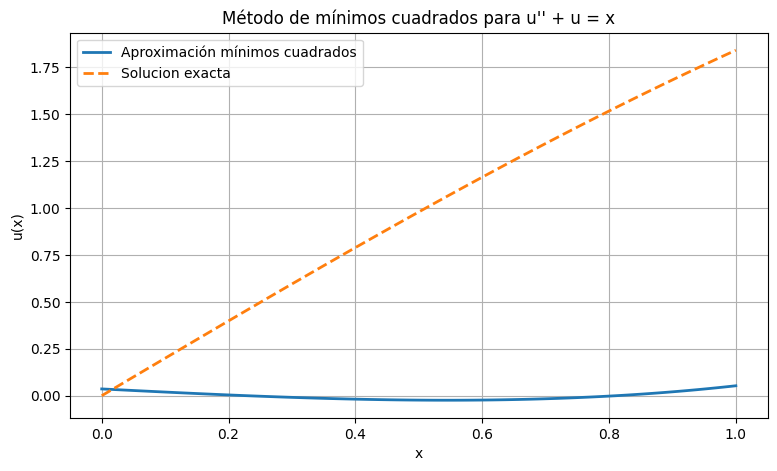

In [24]:
# Graficar comparación
xx = np.linspace(0, 1, 100)
plt.figure(figsize=(9, 5))
plt.plot(xx, u_aprox_nf(xx), label='Aproximación mínimos cuadrados', linewidth=2)
plt.plot(xx, yy, "--", label="Solucion exacta", linewidth=2)
plt.title("Método de mínimos cuadrados para u'' + u = x")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.legend()
plt.show()